In [1]:
from ultralytics import YOLO

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = YOLO("yolov8n.pt")
model.train(data="/app/examples/detection/config.yaml", epochs=10)  # train the model

New https://pypi.org/project/ultralytics/8.0.220 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.191 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (Quadro P1000, 4096MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/app/examples/detection/config.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

: 

In [ ]:
!mv runs/detect/train2/weights/best.onnx /app

In [ ]:
from captum.attr import FeatureAblation

In [ ]:
!mv runs/detect/train3/weights/best.pt /app

In [ ]:
model = YOLO('/app/best.pt')
results = model('/app/black.png')


image 1/1 /app/black.png: 480x640 (no detections), 23.1ms
Speed: 4.2ms preprocess, 23.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


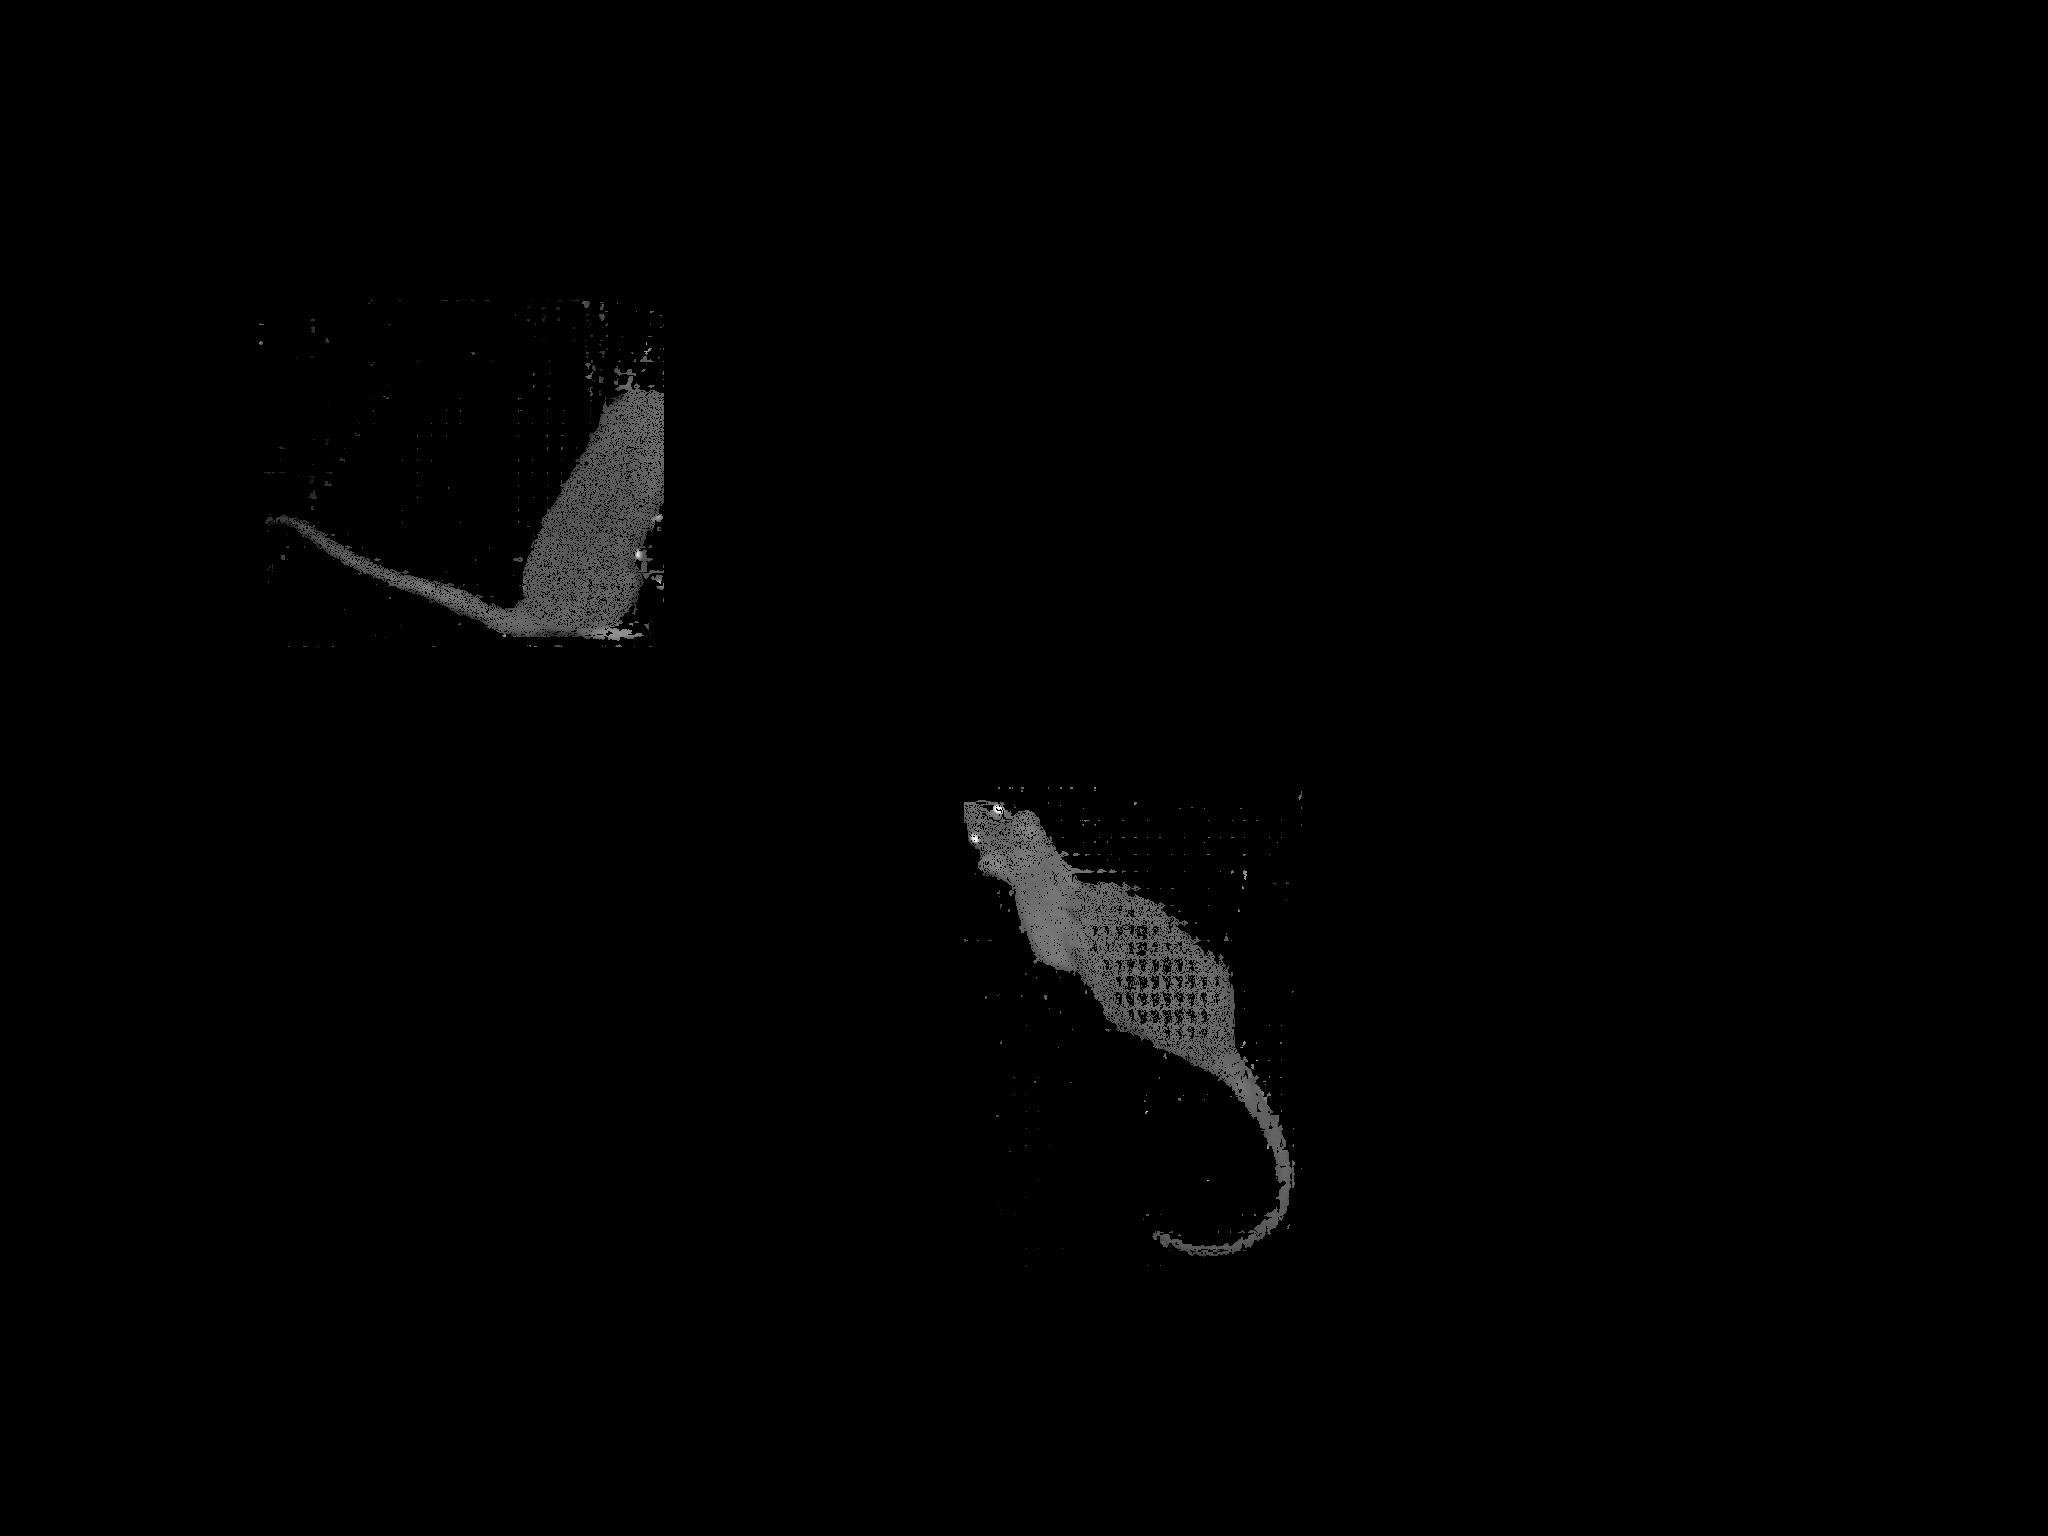

In [ ]:
from PIL import Image

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image